In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import binom,norm,poisson,geom



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart.csv

--2023-01-15 20:11:20--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M  81.5MB/s    in 0.3s    

2023-01-15 20:11:20 (81.5 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



In [ ]:
df = pd.read_csv("walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


### Sum of Null values / Missing values in each column

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df['Product_Category'] = df['Product_Category'].astype(object)
df['Marital_Status'] = df['Marital_Status'].astype(object)
df['User_ID'] = df['User_ID'].astype(object)
df['Occupation'] = df['Occupation'].astype(object)


In [ ]:
  #describing the object columns
df.describe(include = 'object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.ndim

2

In [ ]:
#describing the numerical columns
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


# Unique value and Value Counts

In [ ]:
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

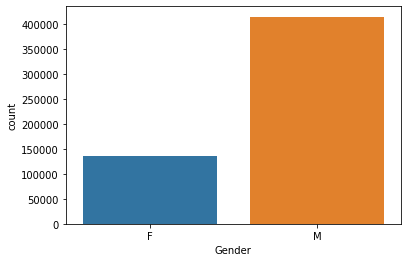

In [ ]:
sns.countplot(x='Gender', data=df)
plt.show()

In [ ]:
males = (df.Gender.value_counts()['M']/df.shape[0]) * 100
females = (df.Gender.value_counts()['F']/df.shape[0]) * 100
print(f"{round(males,2)}% of the customers are Male and {round(females,2)}% of the customers are female.")

75.31% of the customers are Male and 24.69% of the customers are female.


26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64


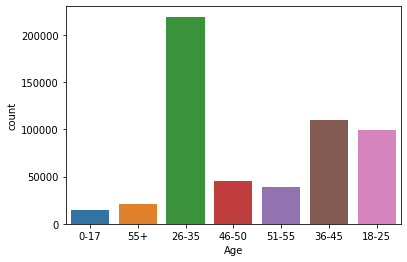

'\nMost of the people lies in the age group of 26-35 which is nearly 39.92% of the total customers.\n'

In [ ]:
print(df.Age.value_counts(normalize=True))

sns.countplot(x='Age', data=df)
plt.show()
"""
Most of the people lies in the age group of 26-35 which is nearly 39.92% of the total customers.
"""


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64


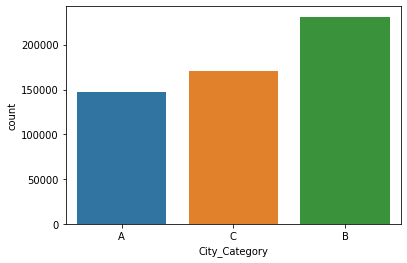

'\nMost of the people lies in the city B which is nearly accounts for 42.03% of the total customers\n'

In [ ]:
print(df.City_Category.value_counts())
print(df.City_Category.value_counts(normalize=True))

sns.countplot(x='City_Category', data=df)
plt.show()
"""
Most of the people lies in the city B which is nearly accounts for 42.03% of the total customers
"""


1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64


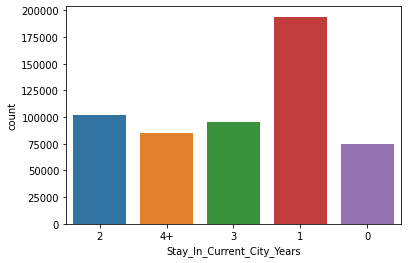

'\nMost of the people have newly migrated to the current city in which they are living and its been an year since living in the state.\n'

In [ ]:
print(df.Stay_In_Current_City_Years.value_counts())
print(df.Stay_In_Current_City_Years.value_counts(normalize=True))

sns.countplot(x='Stay_In_Current_City_Years', data=df)
plt.show()
"""
Most of the people have newly migrated to the current city in which they are living and its been an year since living in the state.
"""


In [ ]:
df.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
df.Occupation.value_counts(normalize=True)

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

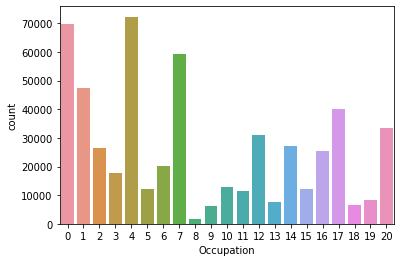

In [ ]:
sns.countplot(x='Occupation', data=df)
plt.show()


0    324731
1    225337
Name: Marital_Status, dtype: int64
0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64


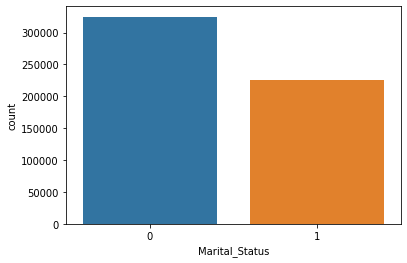

'\nNearly 59% are Unmarried and around 41% are Married\n'

In [ ]:
print(df.Marital_Status.value_counts())
print(df.Marital_Status.value_counts(normalize=True))

sns.countplot(x='Marital_Status', data=df)
plt.show()
"""
Nearly 59% are Unmarried and around 41% are Married
"""


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64
5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category, dtype: float64


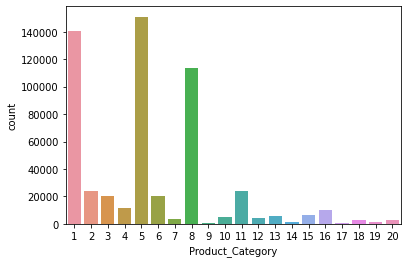

'\nVisually We can see that most popular product category is 1,5,8\n'

In [ ]:
print(df.Product_Category.value_counts())
print(df.Product_Category.value_counts(normalize=True))

sns.countplot(x='Product_Category', data=df)
plt.show()
"""
Visually We can see that most popular product category is 1,5,8
"""


In [ ]:
print("Minimum Purchase : ", df['Purchase'].min())
print("Mean Purchase : ", round(df['Purchase'].mean(),2))
print("Median Purchase : ", round(df['Purchase'].median(),2))
print("Maximum Purchase : ", df['Purchase'].max())

Minimum Purchase :  12
Mean Purchase :  9263.97
Median Purchase :  8047.0
Maximum Purchase :  23961


# Bivariate Analysis

### Purchase VS Gender

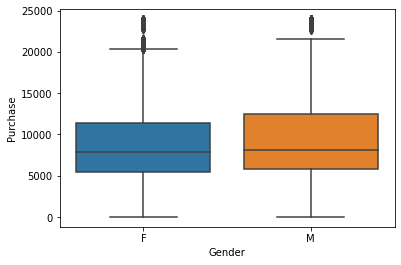

In [ ]:
sns.boxplot(y=df['Purchase'], x=df['Gender'])
plt.show()

In [ ]:
female = df[df.Gender == "F"]
male = df[df.Gender == "M"]
female_IQR = np.percentile(female['Purchase'], 75) - np.percentile(female['Purchase'], 25)
print(f"IQR for Female is {female_IQR}")

male_IQR = np.percentile(male.Purchase, 75) - np.percentile(male.Purchase, 25)
print(f"IQR for male is {male_IQR}")

IQR for Female is 5967.0
IQR for male is 6591.0


### Marital Status vs Purchase

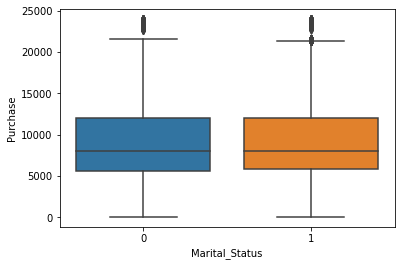

In [ ]:
sns.boxplot(y=df.Purchase, x=df.Marital_Status)
plt.show()

In [ ]:
female = df[df.Marital_Status == 1]
male = df[df.Marital_Status == 0]
female_IQR = np.percentile(female['Purchase'], 75) - np.percentile(female['Purchase'], 25)
print(f"IQR for Female is {female_IQR}")

male_IQR = np.percentile(male.Purchase, 75) - np.percentile(male.Purchase, 25)
print(f"IQR for male is {male_IQR}")

IQR for Female is 6199.0
IQR for male is 6456.0


### Purchase VS CITY

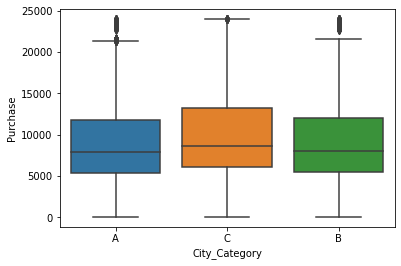

In [ ]:
sns.boxplot(y=df.Purchase, x=df.City_Category)
plt.show()

### PURCHASE VS AGE

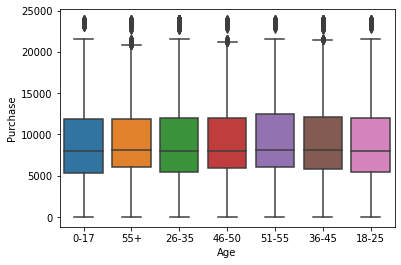

In [ ]:
sns.boxplot(y=df.Purchase, x=df.Age)
plt.show()

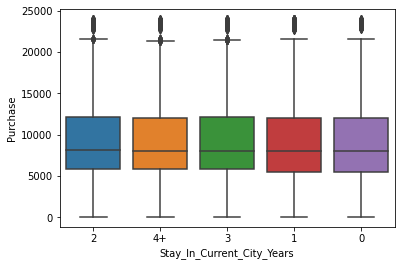

In [ ]:
sns.boxplot(y=df.Purchase, x=df.Stay_In_Current_City_Years)
plt.show()

In [ ]:
def popular_product(x):
  return x['Product_Category'].value_counts(ascending=False).head(1)


In [ ]:
x = df.groupby(['Gender', 'Age', "City_Category"]).apply(popular_product)
x = pd.DataFrame(x)
x

Product_Category
Gender Age   City_Category                    
F      0-17  A             5               447
             B             5               440
             C             5               624
       18-25 A             5              2085
             B             5              3809
             C             5              2034
       26-35 A             5              5790
             B             5              7105
             C             5              3691
       36-45 A             5              2070
             B             5              3233
             C             5              2514
       46-50 A             5               418
             B             8              1760
             C             5              1584
       51-55 A             5               575
             B             8              1307
             C             5              1115
       55+   A             8               109
             B             8               459
             C             8              1210
M      0-17  A             5               300
             B             1              1047
             C             5              1500
       18-25 A             5              5915
             B             1              9138
             C             1              7300
       26-35 A             5             15770
             B             1             20176
             C             1             13943
       36-45 A             5              5185
             B             5              9959
             C             1              7876
       46-50 A             5              1573
             B             5              3679
             C             1              3090
       51-55 A             5              1119
             B             1              3433
             C             1              2966
       55+   A             5               872
             B             8              1070
             C             8              2545

In [ ]:
pd.crosstab(df['Product_Category'], df['Marital_Status']).sort_values([0,1], ascending=False).head(10)

Marital_Status,0,1
Product_Category,,
5,89656,61277
1,84375,56003
8,65411,48514
11,14668,9619
2,14138,9726
3,12359,7854
6,12139,8327
4,7177,4576
16,5713,4115


### Outliers section

In [ ]:
q75, q25 = np.percentile(df['Purchase'], [75,25])
iqr = q75-q25

upper_limit = q75 + 1.5*iqr
lower_limit = 0 if 0>(q25-105*iqr) else (q25-105*iqr)

print(f"Upper limit : {upper_limit}")
print(f"Lower Limit : {lower_limit}")

Upper limit : 21400.5
Lower Limit : 0


In [ ]:
x = (df.Purchase > upper_limit) | (df.Purchase < lower_limit)
df.loc[x,:].shape

(2677, 10)

# We can say that around 2677 number of Purchase comes in the category of outliers in purchase column

## Comparing the Purchases of MAle and Female

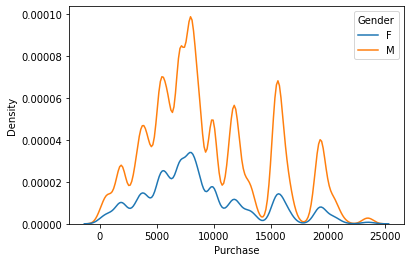

In [ ]:
sns.kdeplot(x='Purchase', data=df, hue='Gender')
plt.show()

## Confidence Interval and distribution of the mean

In [ ]:
from numpy.random import sample, choice
import random

In [ ]:
female_purchase = df.loc[df.Gender == "F"]['Purchase'].values
male_purchase = df.loc[df.Gender == "M"]['Purchase'].values

In [ ]:
def bootstrapped(data, sample_size, no_of_samples):
  sample_mean_list = []
  for _ in range(no_of_samples):
    sample_mean = round(np.mean(random.sample(data, sample_size)), 2)
    sample_mean_list.append(sample_mean)
  return sample_mean_list

In [ ]:
boots_male_samples = bootstrapped(data=list(male_purchase), sample_size=1000, no_of_samples=10000)
boots_female_samples = bootstrapped(data=list(female_purchase), sample_size=1000, no_of_samples=10000)

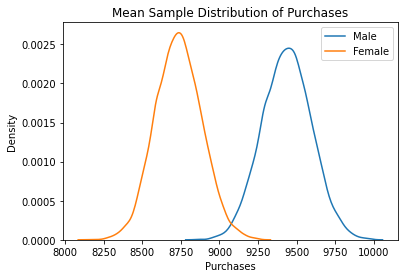

In [ ]:
sns.kdeplot(boots_male_samples, label='Male')
sns.kdeplot(boots_female_samples, label='Female')
plt.title("Mean Sample Distribution of Purchases")
plt.xlabel('Purchases')
plt.legend()
plt.show()

In [ ]:
lower_limit = round(np.percentile(boots_male_samples, 2.5), 2)
upper_limit = round(np.percentile(boots_male_samples, 97.5), 2)
print(f"For Males : 95% confidence interval is : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boots_female_samples, 2.5), 2)
upper_limit = round(np.percentile(boots_female_samples, 97.5), 2)
print(f"For Females : 95% confidence interval is : {lower_limit} to {upper_limit}")

For Males : 95% confidence interval is : 9124.04 to 9753.65
For Females : 95% confidence interval is : 8449.15 to 9034.09


In [ ]:
lower_limit = round(np.percentile(boots_male_samples, 5), 2)
upper_limit = round(np.percentile(boots_male_samples, 95), 2)
print(f"For Males : 90% confidence interval is : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boots_female_samples, 5), 2)
upper_limit = round(np.percentile(boots_female_samples, 95), 2)
print(f"For Females : 90% confidence interval is : {lower_limit} to {upper_limit}")

For Males : 90% confidence interval is : 9172.47 to 9697.79
For Females : 90% confidence interval is : 8492.29 to 8983.62


In [ ]:
lower_limit = round(np.percentile(boots_male_samples, 0.5), 2)
upper_limit = round(np.percentile(boots_male_samples, 99.5), 2)
print(f"For Males : 99% confidence interval is : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boots_female_samples, 0.5), 2)
upper_limit = round(np.percentile(boots_female_samples, 99.5), 2)
print(f"For Females : 99% confidence interval is : {lower_limit} to {upper_limit}")

For Males : 99% confidence interval is : 9034.25 to 9848.31
For Females : 99% confidence interval is : 8350.44 to 9136.98


## Answers for Gender category:
1. The sampling distribution of male and female has very less overlapping
2. Even though the top categories are bought by male and female is very similar, still the purchases made by male is greater than female.
3. ther 95% confidence interval doesn't have any overlap.
4. We can conclude that males spend more then females.
5. If the customer is Male, There is a higher chance of making a bigger pourchase from walmart.

In [ ]:
## MARITAL STATUS

In [ ]:
df.Marital_Status.unique()

array([0, 1], dtype=object)

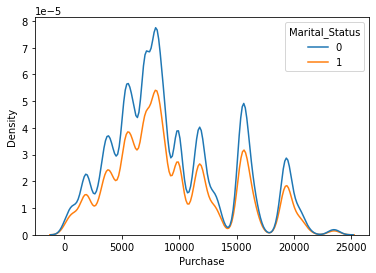

In [ ]:
sns.kdeplot(x='Purchase', data=df, hue='Marital_Status')
plt.show()

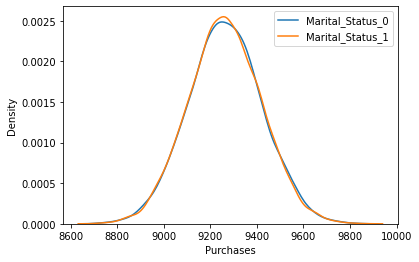

In [ ]:
s_0 = df.loc[df['Marital_Status']==0, :]['Purchase'].values
s_1 = df.loc[df['Marital_Status']==1, :]['Purchase'].values

boots_0_samples = bootstrapped(data=list(s_0), sample_size=1000, no_of_samples=10000)
boots_1_samples = bootstrapped(data=list(s_1), sample_size=1000, no_of_samples=10000)

sns.kdeplot(boots_0_samples, label="Marital_Status_0")
sns.kdeplot(boots_1_samples, label="Marital_Status_1")
plt.xlabel('Purchases')
plt.legend()
plt.show()

In [ ]:
lower_limit = round(np.percentile(boots_0_samples, 2.5), 2)
upper_limit = round(np.percentile(boots_0_samples, 97.5), 2)
print(f"For Marital Status = 0 : 95% confidence interval is : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boots_1_samples, 2.5), 2)
upper_limit = round(np.percentile(boots_1_samples, 97.5), 2)
print(f"For Marital Status = 1 : 95% confidence interval is : {lower_limit} to {upper_limit}")

For Marital Status = 0 : 95% confidence interval is : 8955.42 to 9575.67
For Marital Status = 1 : 95% confidence interval is : 8958.35 to 9568.31


# Insights about Marital Status:
1. The distribution is almost overlaping, it means that, Marital Status does not affect the Purchasing Power of the customer.
2. the 95 % Confidence Interval has so much overlapping
3. The top category bought by male and female is also same.
4. From the above analysis we can conclude that, Purchase made by Married or Unmarried Individual is not significant.
5. Hence Marital Status does not hold much difference  in deciding the Purchase.

In [ ]:
## AGE

In [ ]:
x = df.groupby(['Age']).aggregate({'Purchase':['mean','median','min','max']})
x.columns = ['-'.join(i) for i in x]
x

,Purchase-mean,Purchase-median,Purchase-min,Purchase-max
Age,,,,
0-17,8933.464640,7986.0,12,23955
18-25,9169.663606,8027.0,12,23958
26-35,9252.690633,8030.0,12,23961
36-45,9331.350695,8061.0,12,23960
46-50,9208.625697,8036.0,12,23960
51-55,9534.808031,8130.0,12,23960
55+,9336.280459,8105.5,12,23960


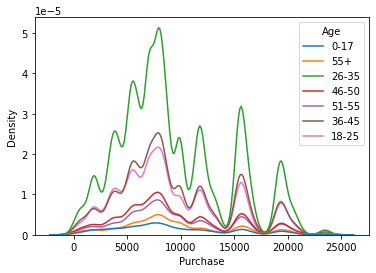

In [ ]:
sns.kdeplot(x='Purchase', data=df, hue='Age')
plt.show()

In [ ]:
pd.crosstab(df['Product_Category'], df['Age']).head(5)


Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
1,3585,26962,58249,27648,10474,9049,4411
2,805,4428,8928,4912,2105,1781,905
3,1200,4710,7662,3854,1376,924,487
4,758,2463,4192,2354,990,678,318
5,4330,28522,61473,29377,11971,9893,5367


In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

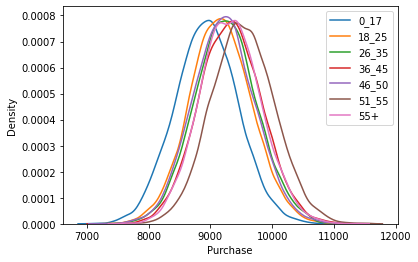

In [ ]:
_0_17_purchase = df.loc[df.Age == '0-17', :]['Purchase'].values
_18_25_purchase = df.loc[df.Age == '18-25', :]['Purchase'].values
_26_35_purchase = df.loc[df.Age == '26-35', :]['Purchase'].values
_36_45_purchase = df.loc[df.Age == '36-45', :]['Purchase'].values
_46_50_purchase = df.loc[df.Age == '46-50', :]['Purchase'].values
_51_55_purchase = df.loc[df.Age == '51-55', :]['Purchase'].values
_55plus_purchase = df.loc[df.Age == '55+', :]['Purchase'].values

boot_0_17_purchase = bootstrapped(data=list(_0_17_purchase), sample_size=100, no_of_samples=10000)
boot_18_25_purchase = bootstrapped(data=list(_18_25_purchase), sample_size=100, no_of_samples=10000)
boot_26_35_purchase = bootstrapped(data=list(_26_35_purchase), sample_size=100, no_of_samples=10000)
boot_36_45_purchase = bootstrapped(data=list(_36_45_purchase), sample_size=100, no_of_samples=10000)
boot_46_50_purchase = bootstrapped(data=list(_46_50_purchase), sample_size=100, no_of_samples=10000)
boot_51_55_purchase = bootstrapped(data=list(_51_55_purchase), sample_size=100, no_of_samples=10000)
boot_55plus_purchase = bootstrapped(data=list(_55plus_purchase), sample_size=100, no_of_samples=10000)

sns.kdeplot(boot_0_17_purchase, label='0_17')
sns.kdeplot(boot_18_25_purchase, label='18_25')
sns.kdeplot(boot_26_35_purchase, label='26_35')
sns.kdeplot(boot_36_45_purchase, label='36_45')
sns.kdeplot(boot_46_50_purchase, label='46_50')
sns.kdeplot(boot_51_55_purchase, label='51_55')
sns.kdeplot(boot_55plus_purchase, label='55+')

plt.xlabel('Purchase')
plt.legend()
plt.show()


In [ ]:
lower_limit = round(np.percentile(boot_0_17_purchase, 2.5), 2)
upper_limit = round(np.percentile(boot_0_17_purchase, 97.5), 2)
print(f"The 95% confidence interval for 0-17 Age group is : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boot_18_25_purchase, 2.5), 2)
upper_limit = round(np.percentile(boot_18_25_purchase, 97.5), 2)
print(f"The 95% confidence interval for 18-25 Age group is : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boot_26_35_purchase, 2.5), 2)
upper_limit = round(np.percentile(boot_26_35_purchase, 97.5), 2)
print(f"The 95% confidence interval for 26-35 Age group is : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boot_36_45_purchase, 2.5), 2)
upper_limit = round(np.percentile(boot_36_45_purchase, 97.5), 2)
print(f"The 95% confidence interval for 36-45 Age group is : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boot_46_50_purchase, 2.5), 2)
upper_limit = round(np.percentile(boot_46_50_purchase, 97.5), 2)
print(f"The 95% confidence interval for 46-50 Age group is : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boot_51_55_purchase, 2.5), 2)
upper_limit = round(np.percentile(boot_51_55_purchase, 97.5), 2)
print(f"The 95% confidence interval for 51-55 Age group is : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boot_55plus_purchase, 2.5), 2)
upper_limit = round(np.percentile(boot_55plus_purchase, 97.5), 2)
print(f"The 95% confidence interval for 55+ Age group is : {lower_limit} to {upper_limit}")


The 95% confidence interval for 0-17 Age group is : 7955.28 to 9945.33
The 95% confidence interval for 18-25 Age group is : 8198.31 to 10160.92
The 95% confidence interval for 26-35 Age group is : 8284.15 to 10266.5
The 95% confidence interval for 36-45 Age group is : 8349.64 to 10326.69
The 95% confidence interval for 46-50 Age group is : 8259.65 to 10215.02
The 95% confidence interval for 51-55 Age group is : 8546.46 to 10538.8
The 95% confidence interval for 55+ Age group is : 8375.76 to 10304.99


# Marital Status Findings:
1. 1,5,8 are common Product categories in all the age groups.
2. product category 6 is specific to 55+ age.
3. the purchase distribution  has very much considerable amount of overlaping.
4. We can concluside from our analysis that the difference in purchase made by different age group is not significant.
5. Hence the age-group does not hold much difference in deciding the purchase.


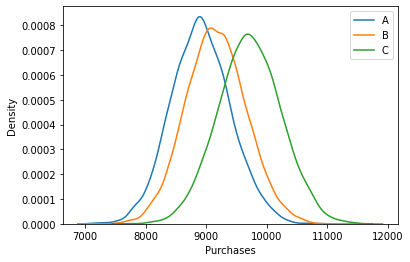

In [ ]:
##CITY Category

A = df.loc[df['City_Category']=='A', :]['Purchase'].values
B = df.loc[df['City_Category']=='B', :]['Purchase'].values
C = df.loc[df['City_Category']=='C', :]['Purchase'].values

boot_A = bootstrapped(data=list(A), sample_size=100, no_of_samples=10000)
boot_B = bootstrapped(data=list(B), sample_size=100, no_of_samples=10000)
boot_C = bootstrapped(data=list(C), sample_size=100, no_of_samples=10000)


sns.kdeplot(boot_A, label='A')
sns.kdeplot(boot_B, label='B')
sns.kdeplot(boot_C, label='C')

plt.xlabel('Purchases')
plt.legend()
plt.show()


In [ ]:
lower_limit = round(np.percentile(boot_A, 2.5), 2)
upper_limit = round(np.percentile(boot_A, 97.5), 2)
print(f"The 95% confidence interval for City_Category A purchases : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boot_B, 2.5), 2)
upper_limit = round(np.percentile(boot_B, 97.5), 2)
print(f"The 95% confidence interval for City_Category B purchases : {lower_limit} to {upper_limit}")

lower_limit = round(np.percentile(boot_C, 2.5), 2)
upper_limit = round(np.percentile(boot_C, 97.5), 2)
print(f"The 95% confidence interval for City_Category C purchases : {lower_limit} to {upper_limit}")


The 95% confidence interval for City_Category A purchases : 7972.89 to 9915.72
The 95% confidence interval for City_Category B purchases : 8192.75 to 10156.86
The 95% confidence interval for City_Category C purchases : 8696.02 to 10740.17


## Findings for City Category
1. Since the overlap of the confidence interval of Category C purchase is less with category B and Category A, we can say that the chances of people of City C make bigger purchases is more comparitively.

## Insights:
1. The part of the people from age 26-35 comprises of 39.92%
2. The part of the people from age 36-45 comprises of 19.99%
3. The part of the people from age 18-25 comprises of 18.11%
4. People who are staing in the current city from last 1 year accounts to 35% of all the customers.
5. The purchase of city C is more than city A and city C.
6. Product belongs to 1,5,8 are most purchased product.


## Recommendation:

1. The most popular categories are 1,8,5. Hence it recommended to have a stock cover and variety cover. Sales might see a good hike when few discounts and offers are created for these categories.

2. As males spend more than female as found in data, there are more chances to increase the sale if offers are more availed for men products.

3. Since most of the customers are from 26-35, there should not be any neglegence in the stock and varity cover for the age bracket.